## LEAD SCORING CASE STUDY

###  Probelm Statement

X Education, an online course provider for professionals, aims to improve its lead conversion rate from 30% to around 80%. Currently, many visitors to their site express interest by filling out a form, becoming leads. However, only a small fraction convert into paying customers. To enhance efficiency, the company wants to identify 'Hot Leads'—those most likely to convert—so the sales team can focus on these promising prospects.

### Goal

Our task is to build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing the necessary libraries

In [1]:
# Importing Pandas and NumPy
import numpy as np, pandas as pd

# Importing the below libraries for visualization
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# Importing required library to split data
from sklearn.model_selection import train_test_split

#Importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set option to display all columns
pd.set_option('display.max_columns', None)


### Step 2: Reading and Inspecting the dataset

In [2]:
# Importing the dataset
Leads= pd.read_csv("Leads.csv")

In [3]:
#Seeing the head of the Leads data
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the shape of the data
Leads.shape

(9240, 37)

The dataset has 9240 rows and 37 columns.

In [5]:
#Checking the data info
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Note: As we can see above there are some columns which has missing values. The datatypes of columns is also valid.

In [6]:
#Checking the statistical aspects of the dataframe
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Cleaning the data

#### Handling the "Select" values that are present in the data

 As we can see from the data and the problem statement that we have "Select" values in few columns.
 The 'Select' values are in data because the customer didnot select any option from the given lists. It is as good as NULL values. Therefore, We are going to replace those values with Null values.

In [7]:
#Converting 'Select' values to NaN
Leads = Leads.replace('Select', np.nan)

In [8]:
# Inspecting null values and arranging it in descending order
(round(Leads.isnull().sum()/len(Leads),2)*100).sort_values(ascending= False)

How did you hear about X Education               78.0
Lead Profile                                     74.0
Lead Quality                                     52.0
Asymmetrique Profile Score                       46.0
Asymmetrique Activity Score                      46.0
Asymmetrique Profile Index                       46.0
Asymmetrique Activity Index                      46.0
City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Last Activity                                     1.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Receive More Updates About Our Courses            0.0
I agree to pay the amount through cheque          0.0
Get updates on DM Content   

##### Dropping the columns having null values more than 40% . Imputing values for columns with a high percentage of missing data can introduce bias. The imputed values may not accurately represent the true distribution of the data, potentially leading to misleading results

In [9]:
columns_null_values_morethan_40= (Leads.columns[((Leads.isnull().sum()/len(Leads))*100)>40]).tolist()
Leads.drop(columns_null_values_morethan_40, axis= 1, inplace= True)

In [10]:
# Checking the null_values again to confirm
(round(Leads.isnull().sum()/len(Leads),2)*100).sort_values(ascending= False)

City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Last Activity                                     1.0
Through Recommendations                           0.0
Receive More Updates About Our Courses            0.0
Prospect ID                                       0.0
Newspaper                                         0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
A free copy of Mastering The Interview            0.0
Digital Advertisement                             0.0
Search                      

##### Checking the columns one by one which has null values less than 40% so that we can impute them accordingly.

### Checking "City" Column

In [11]:
# Checking the value count for the City column.
round(Leads['City'].value_counts(normalize=True,dropna= False),2)*100

City
NaN                            40.0
Mumbai                         35.0
Thane & Outskirts               8.0
Other Cities                    7.0
Other Cities of Maharashtra     5.0
Other Metro Cities              4.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

Most of the values are "Mumbai" so imputing missing value of city column with this.

In [12]:
#Imputed Mumbai with missing values
Leads.City.fillna(value= "Mumbai", inplace= True)

### Checking "Specialization" Column

In [13]:
round(Leads['Specialization'].value_counts(normalize=True,dropna= False),2)*100

Specialization
NaN                                  37.0
Finance Management                   11.0
Human Resource Management             9.0
Marketing Management                  9.0
Operations Management                 5.0
Business Administration               4.0
IT Projects Management                4.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Travel and Tourism                    2.0
Media and Advertising                 2.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   0.0
Name: proportion, dtype: float64

We have 37% null values in this columns. As per my understanding it can be possible that the lead is an student or his/her specilization is not mentioned so we are making a new category called "Others"

In [14]:
# Created a new category called "Others"
Leads.Specialization.fillna(value= "Others", inplace= True)

### Checking "Tags" Column

In [15]:
round(Leads['Tags'].value_counts(normalize=True,dropna= False),2)*100

Tags
NaN                                                  36.0
Will revert after reading the email                  22.0
Ringing                                              13.0
Interested in other courses                           6.0
Already a student                                     5.0
Closed by Horizzon                                    4.0
switched off                                          3.0
Busy                                                  2.0
Lost to EINS                                          2.0
Not doing further education                           2.0
Interested  in full time MBA                          1.0
Graduation in progress                                1.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            0.0
number not provided                                   0.0
in touch 

Most of the values are "Will revert after reading the email" so we will impute the null values with this.

In [16]:
#Imputing missing values
Leads.Tags.fillna(value= "Will revert after reading the email", inplace= True)

### Checking "What matters most to you in choosing a course" column

In [17]:
round(Leads['What matters most to you in choosing a course'].value_counts(normalize=True,dropna= False),2)*100

What matters most to you in choosing a course
Better Career Prospects      71.0
NaN                          29.0
Flexibility & Convenience     0.0
Other                         0.0
Name: proportion, dtype: float64

As we can see 71% of the people choose "Better Career Prospects" and 29% are null. Therefore we are going to remove this column as the data is skewed 

In [18]:
# Dropping this column 
Leads=Leads.drop('What matters most to you in choosing a course',axis=1)

### Checking "What is your current occupation" column

In [19]:
round(Leads['What is your current occupation'].value_counts(normalize=True,dropna= False),2)*100

What is your current occupation
Unemployed              61.0
NaN                     29.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

As most of the values are "Unemployed" we are going to impute this with null values 

In [20]:
#Imputing the values
Leads["What is your current occupation"].fillna(value= "Unemployed", inplace= True)

### Checking "Country" column

In [21]:
round(Leads['Country'].value_counts(normalize=True,dropna= False),2)*100

Country
India                   70.0
NaN                     27.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Bahrain                  0.0
Hong Kong                0.0
Oman                     0.0
France                   0.0
unknown                  0.0
Kuwait                   0.0
South Africa             0.0
Canada                   0.0
Nigeria                  0.0
Germany                  0.0
Sweden                   0.0
Philippines              0.0
Uganda                   0.0
Italy                    0.0
Bangladesh               0.0
Netherlands              0.0
Asia/Pacific Region      0.0
China                    0.0
Belgium                  0.0
Ghana                    0.0
Kenya                    0.0
Sri Lanka                0.0
Tanzania                 0.0
Malaysia                 0.0
Liberia                  0.0
Switze

As we can see that most of the values are "India" with 70% and 27 % are null values. This is an skewed data however, this can be an important column so that the sales team can focus more on india.

In [22]:
#Imputing null values with "India"
Leads["Country"].fillna(value= "India", inplace= True)

In [23]:
#Checking the null values percentage again to confirm the changes which we made
((Leads.isnull().sum()/len(Leads))*100).sort_values(ascending= False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Search                                      0.000000
Newspaper Article                           0.000000
Magazine                                    0.

Now, we only have columns left which has null values less than 2%. Therefore we can remove these rows.

In [24]:
# we are droping the rows as the null values are less
Leads.dropna(inplace= True)

In [25]:
#Shape of the dataset after handling null values
Leads.shape

(9074, 29)

### Checking duplicates values in the data if any

In [26]:
#code for checking the duplicate values
Leads.duplicated().sum()

0

As we can see there are no duplicate values in the data

## Step 4: Univariate and Bivariate Analysis

In [27]:
Leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened


#### A)  Lead Origin

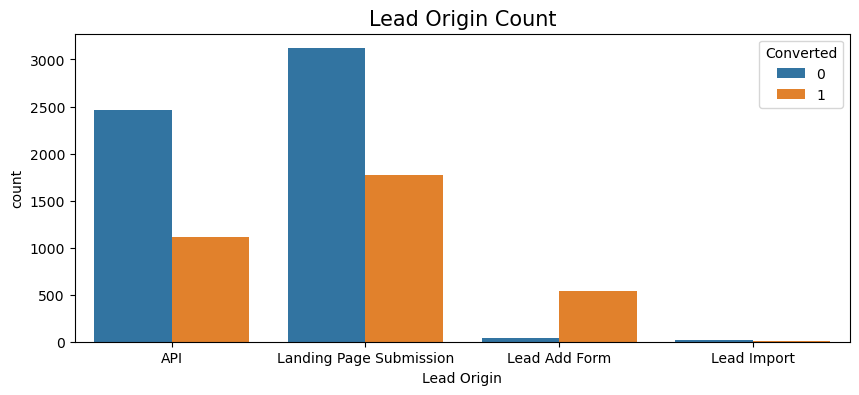

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(x= "Lead Origin", hue= "Converted", data= Leads)
plt.title('Lead Origin Count',fontsize=15)
plt.show()

#### Insights:

1. API and Landing Page Submissions have a conversion rate of 28-34%, and the number of leads originating from them is significant.
2. Lead Add form have approx 90% of conversion rate but the leads are less.

#### B) Lead Source

In [29]:
Leads["Lead Source"].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

We can see that there are two categories "Google" and "google" so we are going to combine it

In [30]:
#Replacing the values
Leads["Lead Source"].replace(["google"], "Google", inplace = True)

Also we can see that most of the categories does not have values so it's better to change it to others

In [31]:
#Changes all the columns which does not have much values to a new category Others
Leads["Lead Source"].replace(["Click2call", "Live Chat", "NC_EDM", "Pay per Click Ads", "Press_Release",
  "Social Media", "WeLearn", "bing", "blog", "testone", "welearnblog_Home", "youtubechannel"],"Others", inplace = True)

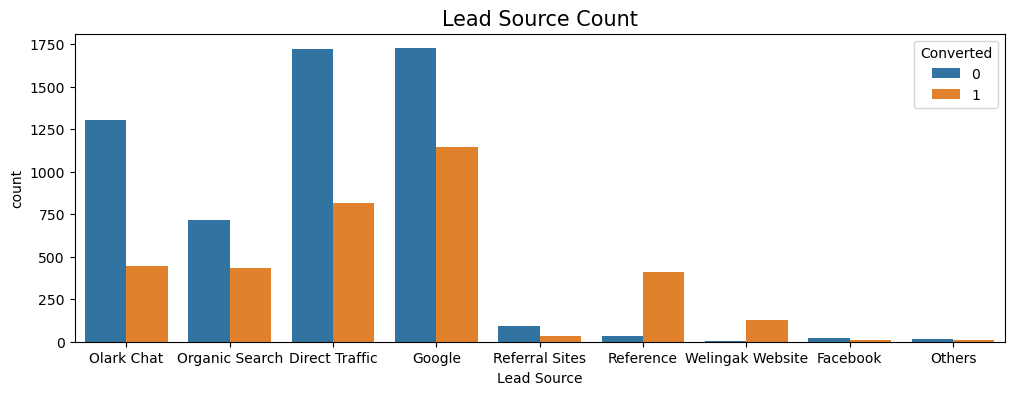

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(x= "Lead Source", hue= "Converted", data= Leads)
plt.title('Lead Source Count',fontsize=15)
plt.show()

### Insights:

1. Google and Direct traffic generate the most leads.
2. Reference leads and those from the Welingak website have high conversion rates.

To boost overall conversion rates, focus on enhancing lead conversion from Olark chat, organic search, direct traffic, and Google leads, while also generating more leads from references and the Welingak website.

### C) Do Not Email

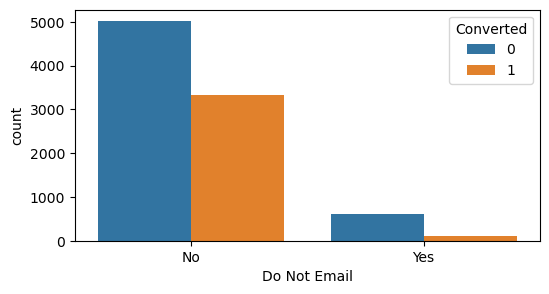

In [33]:
plt.figure(figsize=(6,3))
sns.countplot(x= "Do Not Email", hue= "Converted", data= Leads)
plt.show()

In [34]:
(Leads["Do Not Email"].value_counts(normalize= True))*100

Do Not Email
No     92.109323
Yes     7.890677
Name: proportion, dtype: float64

As we can see most of the values are "No". Therefore, no inference can be made. We will check at the end if we have to remove this column

### D) Do Not Call

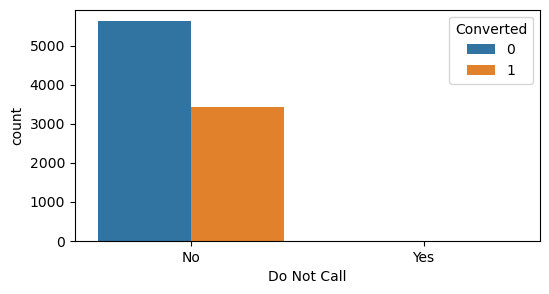

In [35]:
plt.figure(figsize=(6,3))
sns.countplot(x= "Do Not Call", hue= "Converted", data= Leads)
plt.show()

In [36]:
(Leads["Do Not Call"].value_counts(normalize= True))*100

Do Not Call
No     99.977959
Yes     0.022041
Name: proportion, dtype: float64

Almost 100% people have selected "No". Therefore, no insight can be made. We will check at the end if we have to remove this column.

### E) Converted

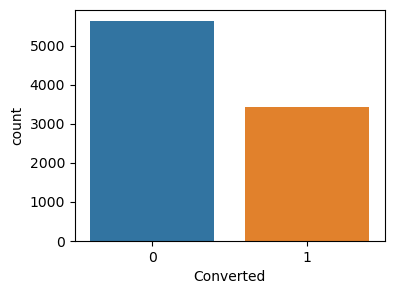

In [37]:
plt.figure(figsize=(4,3))
sns.countplot(x= "Converted", data= Leads)
plt.show()

In [38]:
round(Leads["Converted"].value_counts(normalize= True),2)*100

Converted
0    62.0
1    38.0
Name: proportion, dtype: float64

The Lead conversion rate is 38%

### F) TotalVisits

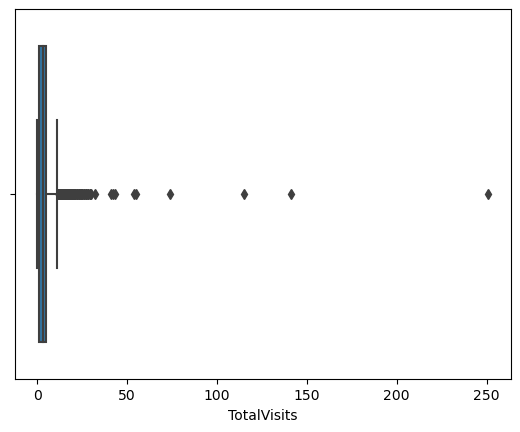

In [39]:
sns.boxplot(x= "TotalVisits", data= Leads)
plt.show()

In [40]:
Leads["TotalVisits"].describe(percentiles=[0,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.85,0.90,0.95,0.99,])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
0%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         2.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         5.000000
85%         6.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

Looking at the above box plot and describtion we can see that we have outliers in this column. We will cap the outliers to 95% value for the analysis.

In [41]:
# Calculate the lower and upper quantile bounds
lower_bound = Leads['TotalVisits'].quantile(0.05)
upper_bound = Leads['TotalVisits'].quantile(0.95)

# Cap the outliers in the 'TotalVisits' column
Leads['TotalVisits'] = np.where(Leads['TotalVisits'] < lower_bound, lower_bound, Leads['TotalVisits'])
Leads['TotalVisits'] = np.where(Leads['TotalVisits'] > upper_bound, upper_bound, Leads['TotalVisits'])

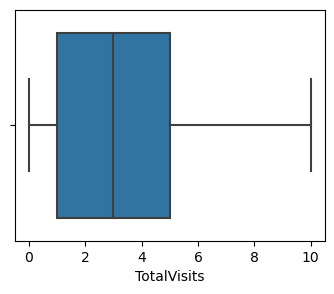

In [42]:
#Checking for the outliers again
plt.figure(figsize=(4,3))
sns.boxplot(x= "TotalVisits", data= Leads)
plt.show()

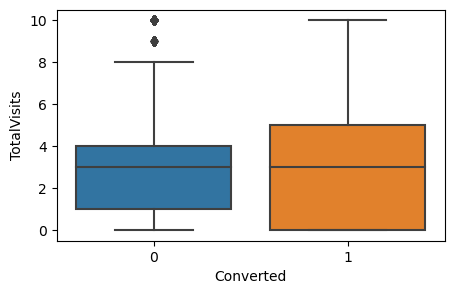

In [43]:
plt.figure(figsize=(5,3))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Leads)
plt.show()

### Insight:

1. We are unable to infer anything on totalvisits as the median for converted and not converted leads are same.

### G) Total Time Spent on Website

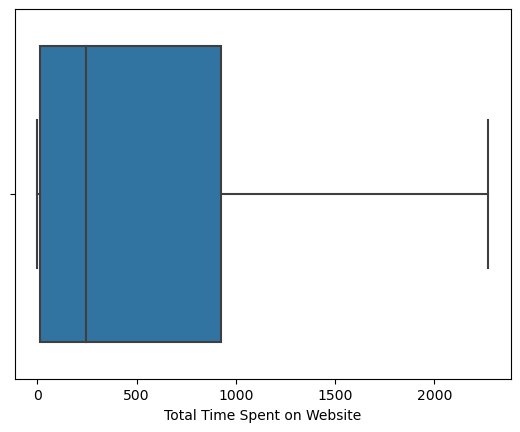

In [44]:
sns.boxplot(x= "Total Time Spent on Website", data= Leads)
plt.show()

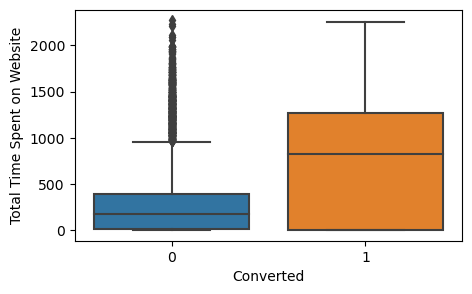

In [45]:
plt.figure(figsize=(5,3))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads)
plt.show()

### Insight:
It can be observed that the Leads that are spending more time on the website are more likely to be converted

### H) City

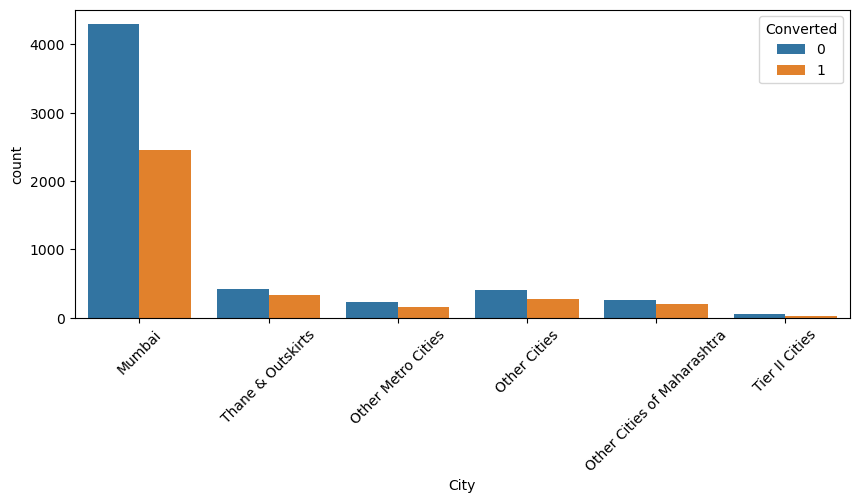

In [46]:
plt.figure(figsize=(10,4))
sns.countplot(x= "City", hue= "Converted", data= Leads)
plt.xticks(rotation = 45)
plt.show()

### Insights:
It can be observed that most leads are from Mumbai with around 50% conversion rate.

### I) Country

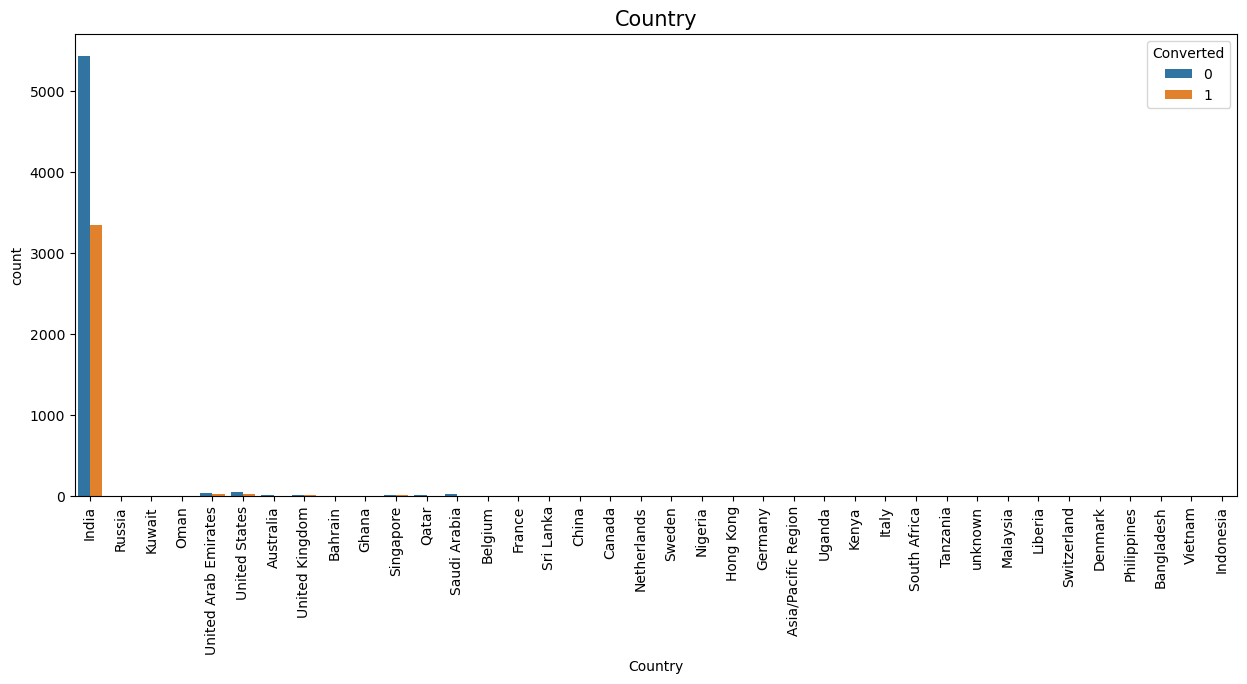

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x= "Country", hue= "Converted", data= Leads)
plt.title('Country',fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Insights:
Only insight from the above plot is that most value for Country in the data is for 'India'

### J) What is your current occupation

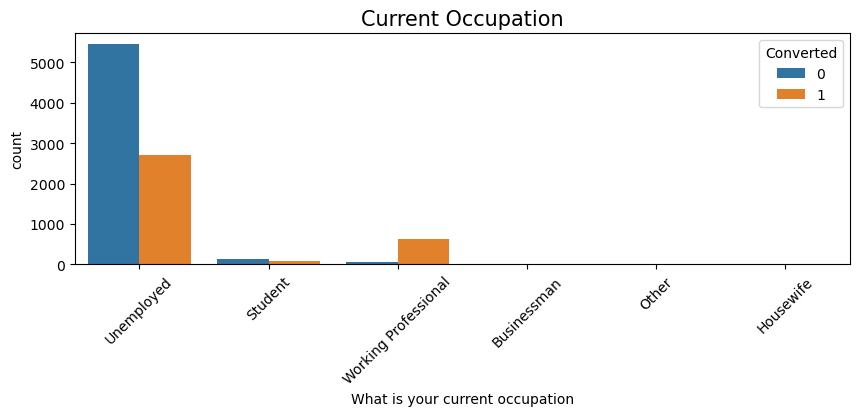

In [48]:
plt.figure(figsize=(10,3))
sns.countplot(x= "What is your current occupation", hue= "Converted", data= Leads)
plt.title('Current Occupation',fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Insight:
1. It can be observed from the above shown graph that 'Unemployed' people are generating maximum leads.
2. Conversion rate of 'Working Professionals' is higher.

### K) Specialization

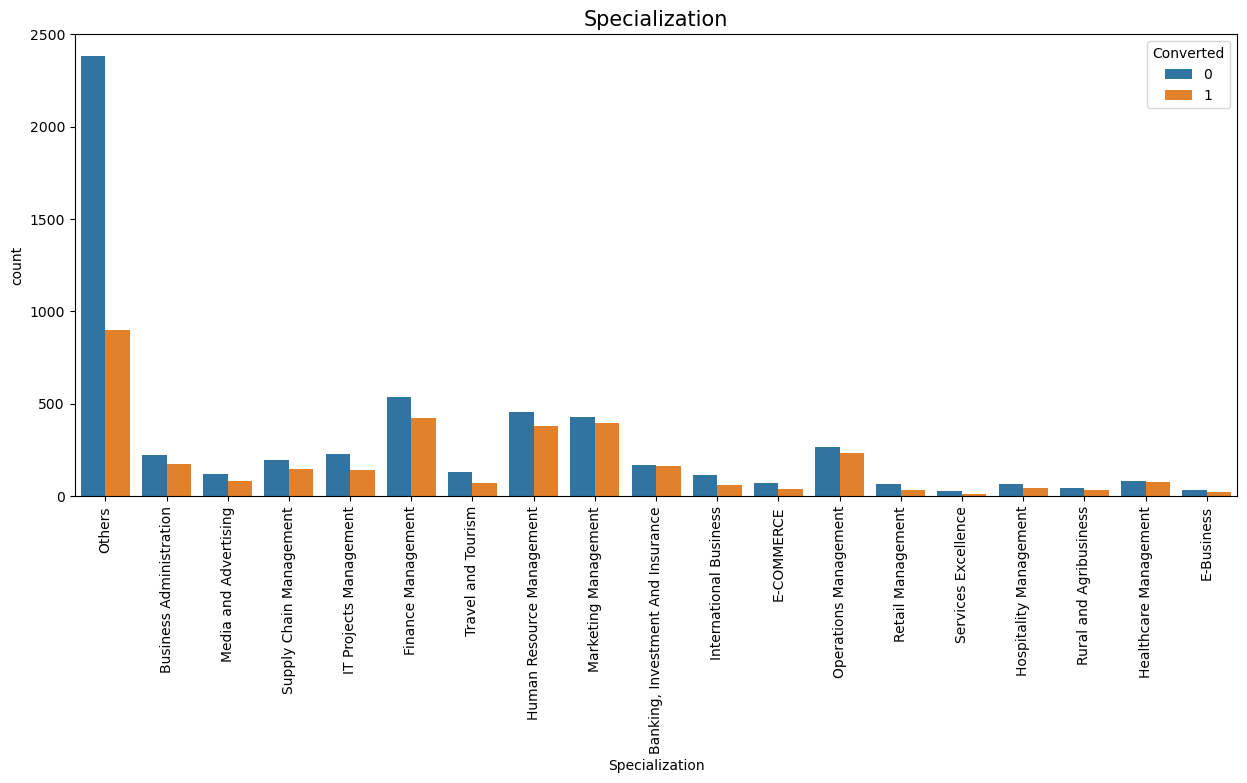

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x= "Specialization", hue= "Converted", data= Leads)
plt.title('Specialization',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Insight
1. The specializations for 'Management' altogether are having more number of leads with significant rate of conversion.
2. The 'Other' specialization is also generating more number of leads.

### L) Tags

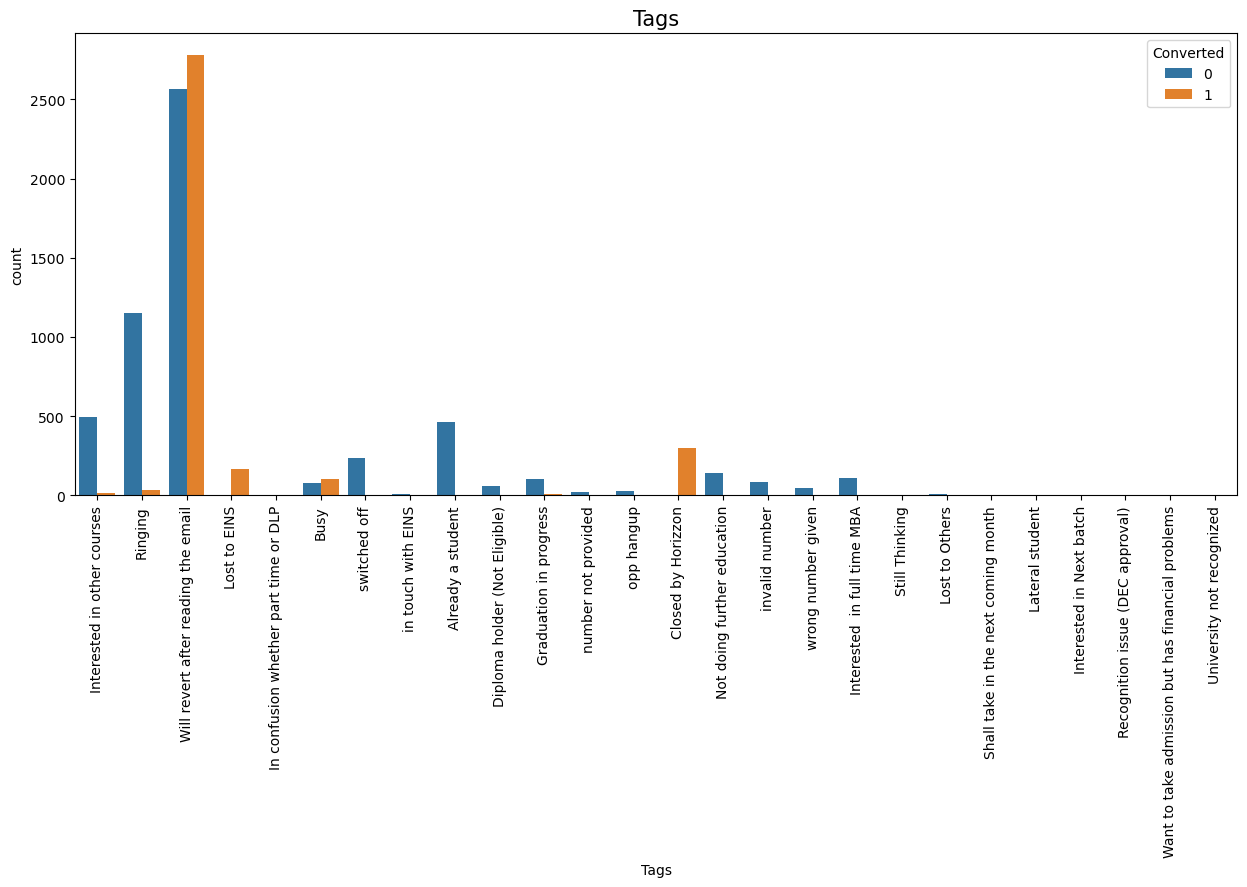

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(x= "Tags", hue= "Converted", data= Leads)
plt.title('Tags',fontsize=15)
plt.xticks(rotation=90)
plt.show()

This column is generated by sales team and it doesnt give any insights. Hence we can exclude it from model building

### Analysing columns having values as 'Yes' or 'No' together

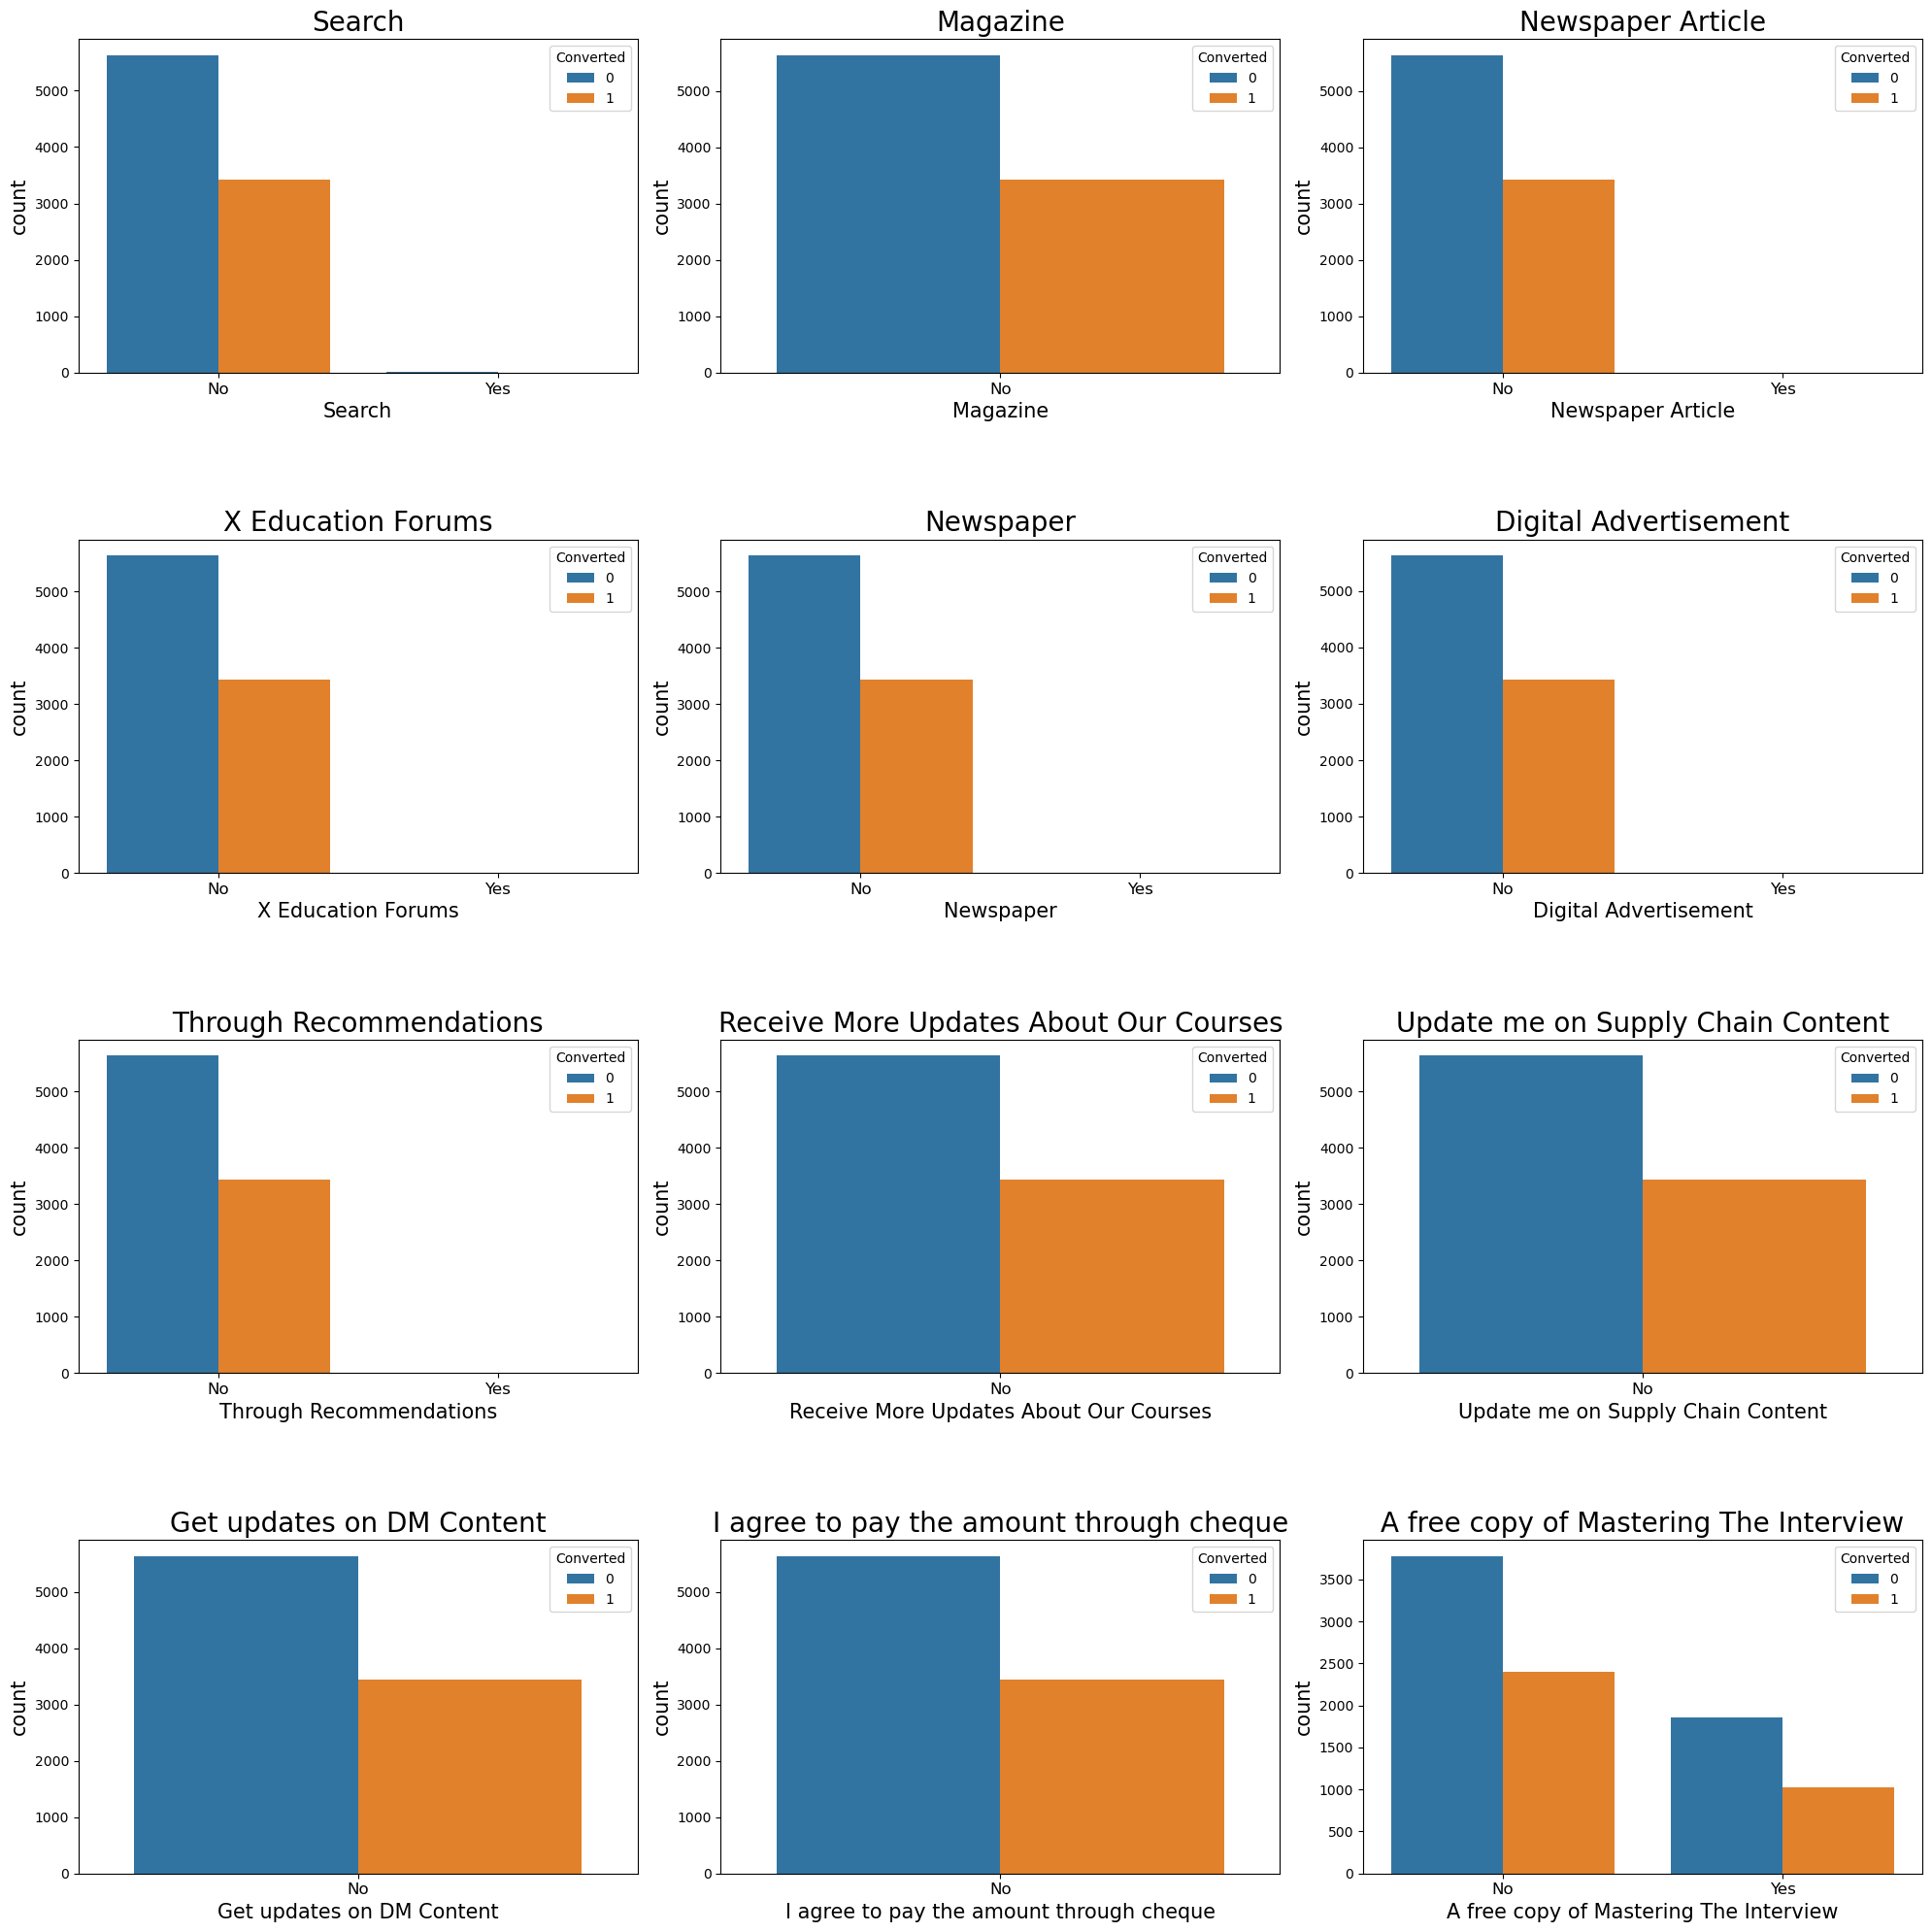

In [51]:
columns = ["Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "A free copy of Mastering The Interview"]

plt.figure(figsize=(20, 20))
# Creating a 4x3 grid of plots
for i, col in enumerate(columns):
    plt.subplot(4, 3, i + 1)  
    sns.countplot(x=col, hue="Converted", data=Leads)
    plt.xticks(fontsize=12)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.title(col, fontsize=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

### Insight:
We can observe from the above subplots that for all these columns most entries are 'No'. Hence nothing can be infered from these columns. 

###### Note: These columns can be excluded while building the model as they are not giving any insights. Along with them there are some columns that are generated by sales team like Prospect ID, Lead Number, Tags which can also be excluded for model building

In [52]:
Leads.shape

(9074, 29)

In [53]:
#Columns before dropping
Leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [54]:
#Dropping the columns which are not useful for model based on analysis
Leads.drop(columns=['Prospect ID', 'Lead Number', 'Tags', 'Country', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'], inplace=True)

In [55]:
Leads.shape

(9074, 13)

In [56]:
#Final columns for model building
Leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

In [57]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activity    

### Step 5: Data Preparation

In [58]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


In [59]:
Leads.nunique()

Lead Origin                           4
Lead Source                           9
Do Not Email                          2
Do Not Call                           2
Converted                             2
TotalVisits                          11
Total Time Spent on Website        1717
Page Views Per Visit                114
Last Activity                        17
Specialization                       19
What is your current occupation       6
City                                  6
Last Notable Activity                16
dtype: int64

#### Converting binary variables (Yes/No) to (1/0)

In [60]:
cols = ['Do Not Email','Do Not Call']

def convert_binary_columns(col):
    return col.map({'Yes': 1, "No": 0})

Leads[cols] = Leads[cols].apply(convert_binary_columns)

In [61]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


#### Creating dummy variables for categorical columns
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [62]:
Leads.nunique()

Lead Origin                           4
Lead Source                           9
Do Not Email                          2
Do Not Call                           2
Converted                             2
TotalVisits                          11
Total Time Spent on Website        1717
Page Views Per Visit                114
Last Activity                        17
Specialization                       19
What is your current occupation       6
City                                  6
Last Notable Activity                16
dtype: int64

In [63]:
#Creating dummy columns
dummyData = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True,dtype= "int")
dummyData.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
# Concatenating the dummyData to the lead_data dataframe
Leads = pd.concat([Leads, dummyData], axis=1)
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [65]:
# Dropping repeated columns for which dummy variables were created:-
Leads = Leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis = 1)
Leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Splitting the data into Train and Test Datasets

In [66]:
#Putting feature variables to X
X = Leads.drop(['Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [67]:
#Putting Target variable to y
y = Leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [68]:
# Splitting the data into train and test of 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
# Checking shape of 'X_train' dataset after splitting
X_train.shape

(6351, 75)

In [70]:
# Checking shape of 'X_test' dataset after splitting
X_test.shape

(2723, 75)

### Checking Correlations
Since number of variables is high, we will check correlation using table instead of Heatmap.

In [71]:
pd.set_option('display.max_rows', None)
Correlation_matrix= Leads.corr()
Correlation_matrix= Correlation_matrix.round(2)
Correlation_matrix

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.00,-0.00,-0.14,0.00,-0.05,0.04,0.10,-0.03,-0.02,-0.02,-0.07,-0.05,0.04,0.01,-0.04,-0.01,0.00,-0.06,0.62,-0.04,0.05,-0.22,-0.00,-0.02,-0.01,-0.06,0.08,-0.00,-0.02,0.01,0.26,-0.01,-0.00,0.01,0.01,0.03,-0.00,0.01,0.01,-0.02,0.07,0.00,-0.03,0.00,-0.01,-0.04,0.02,0.03,0.05,0.00,0.06,-0.01,-0.00,0.01,0.04,-0.05,0.01,-0.00,0.04,-0.01,0.05,0.28,-0.04,0.05,-0.19,-0.00,-0.00,-0.01,0.12,-0.01,0.05,-0.00,-0.03,-0.01,0.24,-0.00
Do Not Call,-0.00,1.00,0.02,0.01,0.01,-0.01,-0.02,0.03,-0.00,-0.00,0.01,-0.01,-0.01,-0.00,0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.02,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,0.06,-0.00,-0.00,-0.00,-0.00,0.02,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.02,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00
Converted,-0.14,0.02,1.00,0.05,0.36,0.00,-0.04,0.30,-0.01,-0.01,0.03,-0.12,-0.00,0.00,0.26,-0.03,0.15,-0.12,-0.13,-0.04,0.02,-0.02,0.02,-0.03,0.05,-0.21,-0.08,0.01,0.34,-0.01,-0.02,-0.01,-0.01,0.03,-0.00,-0.01,0.04,0.03,0.01,0.05,0.00,-0.01,0.07,0.01,0.04,-0.16,-0.01,0.01,-0.01,0.02,-0.01,0.04,0.02,-0.01,-0.28,0.32,0.01,0.03,0.01,0.04,-0.01,-0.04,-0.03,0.02,-0.01,0.01,-0.01,0.04,-0.26,-0.07,-0.03,0.01,0.36,0.04,-0.02,-0.01
TotalVisits,0.00,0.01,0.05,1.00,0.36,0.74,0.45,-0.28,-0.06,-0.06,0.22,-0.50,0.30,-0.00,-0.24,0.09,-0.13,-0.10,-0.07,-0.03,0.00,0.06,0.01,0.02,0.03,-0.22,0.22,-0.01,0.02,0.03,0.02,0.02,0.00,0.07,0.03,0.04,0.09,0.05,0.

From the above table we can observe that the correlation of below mentioned variables is high:

- "Lead Source_Reference" and "Lead Origin_Lead Add Form" = 0.86
- "Last Activity_Email Bounced" and "Do Not Email" = 0.62
- "TotalVisits" and "Page Views Per Visit" = 0.74
- "Lead Origin_Landing Page Submission" and "Specialization_Others" = -0.76

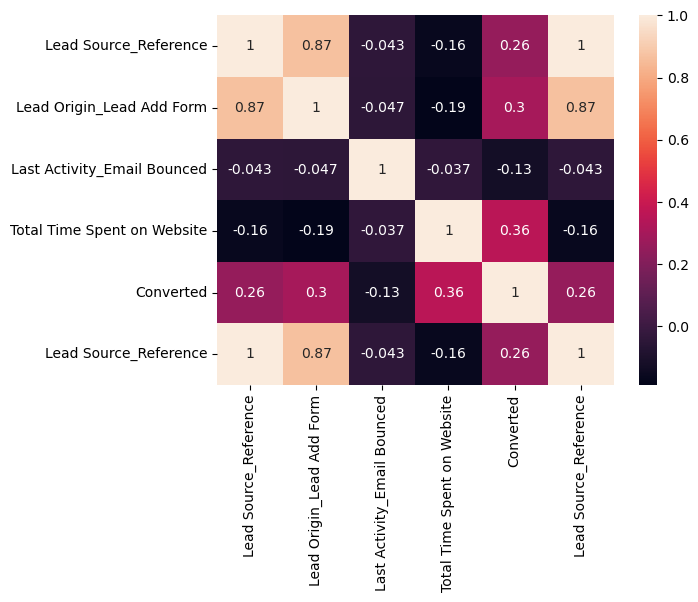

In [72]:
col_corr= ["Lead Source_Reference","Lead Origin_Lead Add Form", "Last Activity_Email Bounced", "Total Time Spent on Website", "Converted","Lead Source_Reference"]
corr_matrix= Leads[col_corr].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Axes: >

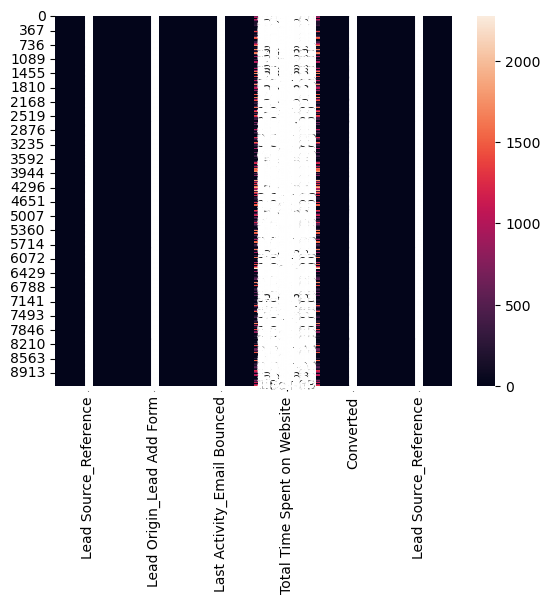

In [73]:
sns.heatmap(Leads[col_corr],annot= True)

### Feature Scaling

In [74]:
#
X_train.head(5)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,2.0,397,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,2.0,190,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,2.0,1380,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,5.0,1584,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [76]:
#Checking lead Conversion Rate
round(Leads["Converted"].value_counts(normalize= True),2)*100

Converted
0    62.0
1    38.0
Name: proportion, dtype: float64

We have almost 38% lead conversion rate

### Feature Selection using RFE

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [78]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False])

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Marked Spam', False, 12),
 ('Last Activity_Email Opened', False, 41),
 ('Last Activity_Email Received', False, 40),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Had a Phone Conversation', True,

In [80]:
# Viewing the columns selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### Step: 6 Model Building

#### Model 1

In [81]:
#importing statsmodel library
import statsmodels.api as sm

In [82]:
X_train_sm = sm.add_constant(X_train[rfe_cols])  # adding the constant
mod1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = mod1.fit()  #fitting the model
result.summary()       #checking the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.1
Date:                Tue, 23 Jul 2024   Deviance:                       5162.3
Time:                        22:43:26   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2629      0.139      9.113      0.000       0.991       1.534
Do Not Email                                            -1.5994      0.202     -7.934      0.000      -1.994      -1.204
Total Time Spent on Website                              1.1077      0.041     27.082      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1038      0.129     -8.534      0.000      -1.357      -0.850
Lead Origin_Lead Add Form                                1.4559      0.896      1.625      0.104      -0.300       3.212
Lead Origin_Lead Import                                  0.9495      0.475      1.998      0.046       0.018       1.881
Lead Source_Olark Chat                                   1.1076      0.124      8.924      0.000       0.864       1.351
Lead Source_Reference                                    1.9171      0.920      2.085      0.037       0.115       3.719
Lead Source_Welingak Website                             4.5013      1.153      3.905      0.000       2.242       6.761
Last Activity_Converted to Lead                         -1.0475      0.229     -4.575      0.000      -1.496      -0.599
Last Activity_Email Bounced                             -1.2319      0.434     -2.840      0.005      -2.082      -0.382
Last Activity_Had a Phone Conversation                   1.8332      0.795      2.307      0.021       0.276       3.390
Last Activity_Olark Chat Conversation                   -1.3318      0.196     -6.809      0.000      -1.715      -0.948
Specialization_Others                                   -1.1091      0.126     -8.813      0.000      -1.356      -0.862
What is your current occupation_Housewife               22.7567   1.52e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Working Professional     2.6228      0.196     13.411      0.000       2.239       3.006
Last Notable Activity_Email Link Clicked                -1.8917      0.257     -7.366      0.000      -2.395      -1.388
Last Notable Activity_Email Opened                      -1.4480      0.089    -16.298      0.000      -1.622      -1.274
Last Notable Activity_Modified                          -1.7583      0.101    -17.401      0.000      -1.956      -1.560
Last Notable Activity_Olark Chat Conversation           -1.4901      0.378     -3.939      0.000      -2.232      -0.749
Last Notable Activity_Page Visited on Website           -1.7167      0.203     -8.437      0.000      -2.116      -1.318
========================================================================================================================
"""

Here we can see that the p value of variable 'What is your current occupation_Housewife' is highest, that is, 0.999. Hnece we will drop it.

In [83]:
# Dropping the column 'What is your current occupation_Housewife'
column1 = rfe_cols.drop('What is your current occupation_Housewife')

#### Model 2

In [84]:
X_train_sm = sm.add_constant(X_train[column1])
mod2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = mod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.3
Date:                Tue, 23 Jul 2024   Deviance:                       5170.7
Time:                        22:43:26   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2649      0.138      9.134      0.000       0.993       1.536
Do Not Email                                            -1.6003      0.202     -7.938      0.000      -1.995      -1.205
Total Time Spent on Website                              1.1070      0.041     27.094      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1043      0.129     -8.547      0.000      -1.357      -0.851
Lead Origin_Lead Add Form                                1.4532      0.896      1.622      0.105      -0.302       3.209
Lead Origin_Lead Import                                  0.9439      0.475      1.986      0.047       0.012       1.876
Lead Source_Olark Chat                                   1.1057      0.124      8.912      0.000       0.863       1.349
Lead Source_Reference                                    1.9343      0.919      2.104      0.035       0.132       3.736
Lead Source_Welingak Website                             4.5037      1.153      3.907      0.000       2.245       6.763
Last Activity_Converted to Lead                         -1.0474      0.229     -4.575      0.000      -1.496      -0.599
Last Activity_Email Bounced                             -1.2305      0.434     -2.837      0.005      -2.081      -0.380
Last Activity_Had a Phone Conversation                   1.8329      0.795      2.307      0.021       0.276       3.390
Last Activity_Olark Chat Conversation                   -1.3297      0.196     -6.798      0.000      -1.713      -0.946
Specialization_Others                                   -1.1139      0.126     -8.857      0.000      -1.360      -0.867
What is your current occupation_Working Professional     2.6183      0.196     13.386      0.000       2.235       3.002
Last Notable Activity_Email Link Clicked                -1.8827      0.256     -7.365      0.000      -2.384      -1.382
Last Notable Activity_Email Opened                      -1.4410      0.089    -16.235      0.000      -1.615      -1.267
Last Notable Activity_Modified                          -1.7578      0.101    -17.398      0.000      -1.956      -1.560
Last Notable Activity_Olark Chat Conversation           -1.4891      0.378     -3.936      0.000      -2.231      -0.748
Last Notable Activity_Page Visited on Website           -1.7164      0.203     -8.436      0.000      -2.115      -1.318
========================================================================================================================
"""

Here the p value of variable 'Lead Origin_Lead Add Form' is the highest that is 0.105, hence we will drop it

In [85]:
# Dropping the column 'Lead Origin_Lead Add Form'
column2 = column1.drop('Lead Origin_Lead Add Form')

#### Model 3

In [86]:
X_train_sm = sm.add_constant(X_train[column2])
mod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = mod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.8
Date:                Tue, 23 Jul 2024   Deviance:                       5173.6
Time:                        22:43:26   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4046
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2852      0.138      9.308      0.000       1.015       1.556
Do Not Email                                            -1.6030      0.202     -7.952      0.000      -1.998      -1.208
Total Time Spent on Website                              1.1047      0.041     27.082      0.000       1.025       1.185
Lead Origin_Landing Page Submission                     -1.1226      0.129     -8.713      0.000      -1.375      -0.870
Lead Origin_Lead Import                                  0.9277      0.476      1.951      0.051      -0.004       1.860
Lead Source_Olark Chat                                   1.0983      0.124      8.870      0.000       0.856       1.341
Lead Source_Reference                                    3.3728      0.243     13.871      0.000       2.896       3.849
Lead Source_Welingak Website                             5.9478      0.733      8.117      0.000       4.512       7.384
Last Activity_Converted to Lead                         -1.0494      0.229     -4.585      0.000      -1.498      -0.601
Last Activity_Email Bounced                             -1.2304      0.434     -2.836      0.005      -2.081      -0.380
Last Activity_Had a Phone Conversation                   1.8279      0.795      2.300      0.021       0.271       3.385
Last Activity_Olark Chat Conversation                   -1.3343      0.196     -6.822      0.000      -1.718      -0.951
Specialization_Others                                   -1.1260      0.126     -8.964      0.000      -1.372      -0.880
What is your current occupation_Working Professional     2.6154      0.196     13.367      0.000       2.232       2.999
Last Notable Activity_Email Link Clicked                -1.8859      0.256     -7.379      0.000      -2.387      -1.385
Last Notable Activity_Email Opened                      -1.4424      0.089    -16.252      0.000      -1.616      -1.268
Last Notable Activity_Modified                          -1.7585      0.101    -17.408      0.000      -1.957      -1.561
Last Notable Activity_Olark Chat Conversation           -1.4877      0.378     -3.932      0.000      -2.229      -0.746
Last Notable Activity_Page Visited on Website           -1.7101      0.203     -8.436      0.000      -2.107      -1.313
========================================================================================================================
"""

#### Checking VIF

In [87]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[column2].columns
vif['VIF'] = [variance_inflation_factor(X_train[column2].values, i) for i in range(X_train[column2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,2.72
11,Specialization_Others,2.46
2,Lead Origin_Landing Page Submission,2.38
4,Lead Source_Olark Chat,2.09
10,Last Activity_Olark Chat Conversation,2.03
14,Last Notable Activity_Email Opened,1.89
0,Do Not Email,1.85
8,Last Activity_Email Bounced,1.76
16,Last Notable Activity_Olark Chat Conversation,1.37
1,Total Time Spent on Website,1.28


As we can see in the above output of VIF values, all the variables have VIF value < 5. However the P-value of the variable 'Lead Origin_Lead Import' is 0.051, hence we will drop this variable.

In [88]:
#Dropping 'Lead Origin_Lead Import' column
column3 = column2.drop('Lead Origin_Lead Import')

#### Model 4

In [89]:
X_train_sm = sm.add_constant(X_train[column3])  #adding constant
mod4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = mod4.fit()  #fitting the model
res.summary()     # checking the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.5
Date:                Tue, 23 Jul 2024   Deviance:                       5177.0
Time:                        22:43:27   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3219      0.137      9.645      0.000       1.053       1.590
Do Not Email                                            -1.6030      0.201     -7.957      0.000      -1.998      -1.208
Total Time Spent on Website                              1.0971      0.041     27.076      0.000       1.018       1.176
Lead Origin_Landing Page Submission                     -1.1593      0.128     -9.078      0.000      -1.410      -0.909
Lead Source_Olark Chat                                   1.0710      0.123      8.721      0.000       0.830       1.312
Lead Source_Reference                                    3.3368      0.242     13.765      0.000       2.862       3.812
Lead Source_Welingak Website                             5.9219      0.733      8.083      0.000       4.486       7.358
Last Activity_Converted to Lead                         -1.0546      0.229     -4.612      0.000      -1.503      -0.606
Last Activity_Email Bounced                             -1.2313      0.434     -2.838      0.005      -2.082      -0.381
Last Activity_Had a Phone Conversation                   1.8178      0.794      2.290      0.022       0.262       3.374
Last Activity_Olark Chat Conversation                   -1.3404      0.196     -6.852      0.000      -1.724      -0.957
Specialization_Others                                   -1.1480      0.126     -9.148      0.000      -1.394      -0.902
What is your current occupation_Working Professional     2.6157      0.196     13.375      0.000       2.232       2.999
Last Notable Activity_Email Link Clicked                -1.8852      0.255     -7.379      0.000      -2.386      -1.384
Last Notable Activity_Email Opened                      -1.4353      0.089    -16.200      0.000      -1.609      -1.262
Last Notable Activity_Modified                          -1.7540      0.101    -17.380      0.000      -1.952      -1.556
Last Notable Activity_Olark Chat Conversation           -1.4774      0.378     -3.908      0.000      -2.218      -0.736
Last Notable Activity_Page Visited on Website           -1.7112      0.202     -8.451      0.000      -2.108      -1.314
========================================================================================================================
"""

Since the P-values of all variables is less than 0.05 and VIF values are low for all the variables, model 4 is our final model. We have 17
variables in our final model.

#### Making Prediction on the Train data

In [90]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.190235
1012    0.142264
9226    0.184805
4750    0.877116
7987    0.650672
1281    0.762840
2880    0.096256
4971    0.968031
7536    0.849901
1248    0.609897
dtype: float64

In [91]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19023481, 0.14226437, 0.18480491, 0.8771163 , 0.65067236,
       0.76284006, 0.09625605, 0.96803131, 0.84990127, 0.60989674])

In [92]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
0,0,0.190235,3009
1,0,0.142264,1012
2,0,0.184805,9226
3,1,0.877116,4750
4,1,0.650672,7987


##### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
##### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [93]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,ID,Predicted
0,0,0.190235,3009,0
1,0,0.142264,1012,0
2,0,0.184805,9226,0
3,1,0.877116,4750,1
4,1,0.650672,7987,1


#### Making the Confusion matrix

In [94]:
from sklearn import metrics

# Confusion matrix 
confusionMetrics = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusionMetrics)

[[3462  443]
 [ 719 1727]]


In [95]:
#The confusion matrix indicates as below
# Predicted       not_converted    converted
 # Actual
 
 #not_converted        3462          443
 #converted            719          1727  

In [96]:
# Checking the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy : 0.8170366871358841


##### Metrics beyond simply accuracy

In [97]:
TP = confusionMetrics[1,1] # true positive 
TN = confusionMetrics[0,0] # true negatives
FP = confusionMetrics[0,1] # false positives
FN = confusionMetrics[1,0] # false negatives

In [98]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7060506950122649


In [99]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8865556978233035


In [100]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7958525345622119


In [101]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8280315713944032


Our specificity was good at around 89%, but our sensitivity was around 71%, which needed improvement. The low sensitivity was due to the arbitrary cut-off point of 0.5. To optimize this cut-off and improve sensitivity, we will use the ROC curve

#### Plotting ROC Curve

An ROC curve illustrates the following:

The tradeoff between sensitivity and specificity (increasing sensitivity decreases specificity).
Higher accuracy is indicated when the curve closely follows the left and top borders of the ROC space.
Lower accuracy is indicated when the curve approaches the 45-degree diagonal in the ROC space.

In [102]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

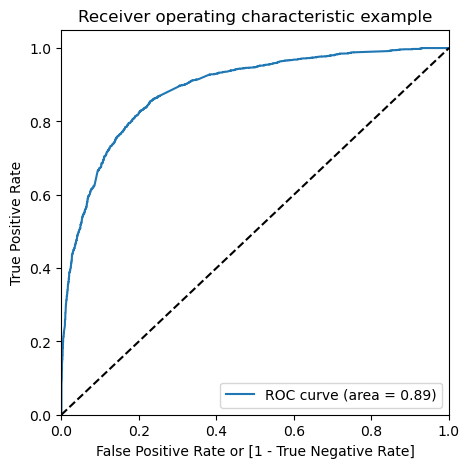

In [104]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

With an area under the ROC curve of 0.89, our model performs well.

Finding the Optimal Cutoff Point:
Initially, we chose a cut-off value of 0.5 arbitrarily. Now, we need to identify the best cut-off value. The optimal cutoff probability balances sensitivity and specificity.

In [105]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.190235,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.142264,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.184805,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.877116,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.650672,7987,1,1,1,1,1,1,1,1,0,0,0


In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
df_cutoff = pd.DataFrame( columns = ['prob_cutoff','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df_cutoff.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(df_cutoff)

     prob_cutoff  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.600378     0.971791     0.367734
0.2          0.2  0.759565     0.908422     0.666325
0.3          0.3  0.802551     0.849959     0.772855
0.4          0.4  0.815462     0.783320     0.835595
0.5          0.5  0.817037     0.706051     0.886556
0.6          0.6  0.802236     0.604661     0.925992
0.7          0.7  0.784286     0.520850     0.949296
0.8          0.8  0.766179     0.438675     0.971319
0.9          0.9  0.724768     0.304579     0.987964


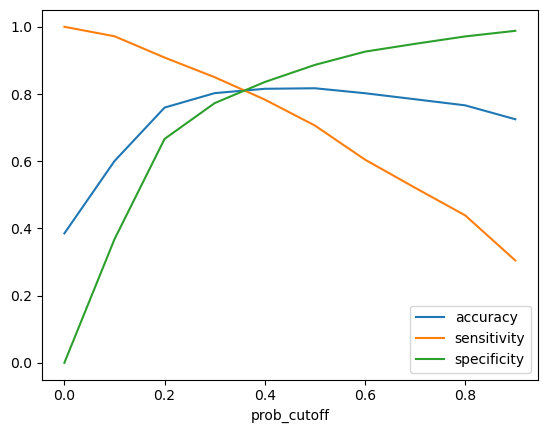

In [107]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
df_cutoff.plot.line(x='prob_cutoff', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [108]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.190235,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.142264,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.184805,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.877116,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.650672,7987,1,1,1,1,1,1,1,1,0,0,0,1


#### Assigning Lead Score to the Training data

In [109]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.190235,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.142264,1012,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.184805,9226,0,1,1,0,0,0,0,0,0,0,0,0,18
3,1,0.877116,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.650672,7987,1,1,1,1,1,1,1,1,0,0,0,1,65


### Model Evaluation

In [110]:
# Checking the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

Accuracy : 0.8093213667139033


In [111]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3142,  763],
       [ 448, 1998]], dtype=int64)

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
# Checking the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8168438266557645


In [114]:
# Calculating specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8046094750320102


In [115]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19539052496798975


In [116]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.723650851140891


In [117]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8752089136490251


### Precision Recall

In [118]:
confusionMatrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusionMatrix

array([[3462,  443],
       [ 719, 1727]], dtype=int64)

In [119]:
#Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [120]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted))

Precision : 0.7958525345622119


In [121]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Recall : 0.7060506950122649


#### Precision and recall tradeoff

In [122]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

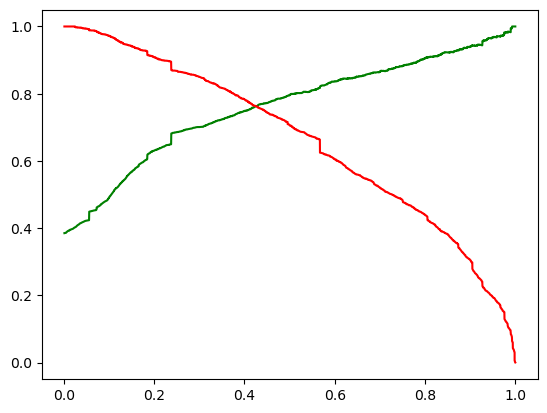

In [124]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The graph shows the trade off between Precision and Recall

### Step: 7 Making Predictions on Test Data

#### Scaling the test data

In [125]:
X_test.head(5)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,4.0,157,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,5.0,1513,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,2.0,74,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,8.0,164,8.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [126]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [127]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[column3]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [128]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

In [129]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.127824
1490    0.968125
7936    0.110327
4216    0.873219
3830    0.128143
1800    0.627397
6507    0.365245
4821    0.294252
4223    0.926607
4714    0.184805
dtype: float64

In [130]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [131]:
y_pred_1.head(5)

,0
3271,0.127824
1490,0.968125
7936,0.110327
4216,0.873219
3830,0.128143


In [132]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [133]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [134]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [135]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [136]:
y_pred_final.head()

,Converted,ID,0
0,0,3271,0.127824
1,1,1490,0.968125
2,0,7936,0.110327
3,1,4216,0.873219
4,0,3830,0.128143


In [137]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [138]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['ID','Converted','Converted_prob'])

In [139]:
y_pred_final.head(5)

,ID,Converted,Converted_prob
0,3271,0,0.127824
1,1490,1,0.968125
2,7936,0,0.110327
3,4216,1,0.873219
4,3830,0,0.128143


In [140]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [141]:
y_pred_final.head()

,ID,Converted,Converted_prob,Final_Predicted
0,3271,0,0.127824,0
1,1490,1,0.968125,1
2,7936,0,0.110327,0
3,4216,1,0.873219,1
4,3830,0,0.128143,0


In [142]:
#Checking overall accuracy
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

Accuracy : 0.8049944913698127


In [143]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[1393,  341],
       [ 190,  799]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Checking the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.80788675429727


In [146]:
#calculating specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8033448673587081


#### Assigning Lead Score to Test Data

In [147]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,ID,Converted,Converted_prob,Final_Predicted,Lead_Score
0,3271,0,0.127824,0,13
1,1490,1,0.968125,1,97
2,7936,0,0.110327,0,11
3,4216,1,0.873219,1,87
4,3830,0,0.128143,0,13


#### Observations:

After running the model on the Test Data , we obtain:

- Accuracy : 80.5 %
- Sensitivity : 80.8 %
- Specificity : 80.3 %

#### Results :

 1) Comparing the values obtained for Train & Test:

#### Train Data:

- Accuracy : 81.0 %
- Sensitivity : 81.6 %
- Specificity : 80.6 %

#### Test Data:

- Accuracy : 80.5 %
- Sensitivity : 80.8 %
- Specificity : 80.3 %

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.


 2) Finding out the leads which should be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [148]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads.head(15)

,ID,Converted,Converted_prob,Final_Predicted,Lead_Score
1,1490,1,0.968125,1,97
3,4216,1,0.873219,1,87
8,4223,1,0.926607,1,93
16,1946,1,0.928191,1,93
21,2461,1,0.994065,1,99
23,5822,1,0.998166,1,100
25,2684,1,0.998166,1,100
30,2010,1,0.981865,1,98
33,4062,1,0.986703,1,99
35,7696,1,0.937032,1,94


In [149]:
hot_leads.shape

(385, 5)

So there are 385 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [150]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049,
       1518, 4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947,
       4807,  446,  789, 8372, 5805, 3758, 1561,  737, 9034, 6423, 8286,
       7174, 4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297,
       5490, 1995, 6532, 4498, 5797, 8687,  831, 7653, 4149,  243, 6743,
       3307, 3976, 5769, 1051, 1663, 3288, 8959, 7521, 8282, 8213, 9063,
       5292, 6913, 6015, 1481,  785, 3265, 3285, 7433, 2460, 3858, 3810,
       2009, 8106,  373, 3055, 7417, 4179, 8076, 8568, 7268, 6784, 6754,
       7236, 2960, 7753, 3983,  802, 8745, 4717,  505, 8509, 6094, 4992,
       7036, 2680, 7065,  112, 6149, 7157, 3827, 7175, 1675, 6999, 5826,
       8492, 6499, 2481, 3439, 4612, 7129, 4793, 1557, 4837, 2495,  822,
       2378, 5090, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489, 2961,
       1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174, 2674,
       8065, 2095, 1568, 8597, 4865, 3535, 4708, 13

#### Important Features from our final model:

In [151]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.921949
Lead Source_Reference                                   3.336798
What is your current occupation_Working Professional    2.615675
Last Activity_Had a Phone Conversation                  1.817844
const                                                   1.321864
Total Time Spent on Website                             1.097069
Lead Source_Olark Chat                                  1.070993
Last Activity_Converted to Lead                        -1.054611
Specialization_Others                                  -1.148047
Lead Origin_Landing Page Submission                    -1.159282
Last Activity_Email Bounced                            -1.231342
Last Activity_Olark Chat Conversation                  -1.340397
Last Notable Activity_Email Opened                     -1.435257
Last Notable Activity_Olark Chat Conversation          -1.477445
Do Not Email                                           -1.603007
Last Notable Activity_Pag

#### END